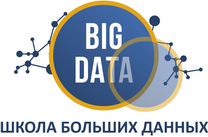

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from warnings import filterwarnings

In [2]:
filterwarnings('ignore')

### Грузим данные

In [3]:
DATA_PATH = '../../data/datasets/weatherdata.csv'

In [4]:
df_weather = pd.read_csv(DATA_PATH)
df_weather.head()

,timestamp,temp,windspeed,humidity,precip,pressure,conditions,dailyprecip,dailysnow,fog,rain,snow
0,2016-01-01 00:51:00,42.1,4.6,51.0,0.0,30.06,Overcast,0.00,0.00,0,0,0
1,2016-01-01 01:51:00,41.0,3.5,53.0,0.0,30.06,Overcast,0.00,0.00,0,0,0
2,2016-01-01 02:51:00,41.0,4.6,55.0,0.0,30.06,Overcast,0.00,0.00,0,0,0
3,2016-01-01 03:51:00,41.0,9.2,55.0,0.0,30.06,Overcast,0.00,0.00,0,0,0
4,2016-01-01 04:51:00,39.9,10.4,58.0,0.0,30.04,Overcast,0.00,0.00,0,0,0


In [5]:
df_weather.tail()

,timestamp,temp,windspeed,humidity,precip,pressure,conditions,dailyprecip,dailysnow,fog,rain,snow
5170,2016-07-01 22:25:00,66.9,NaN,93.0,0.44,29.90,Light Rain,0.83,0.00,0,1,0
5171,2016-07-01 22:29:00,66.9,NaN,93.0,0.44,29.90,Light Rain,0.83,0.00,0,1,0
5172,2016-07-01 22:38:00,66.0,3.5,93.0,0.44,29.90,Mostly Cloudy,0.83,0.00,0,0,0
5173,2016-07-01 22:51:00,66.9,3.5,93.0,0.44,29.88,Scattered Clouds,0.83,0.00,0,0,0
5174,2016-07-01 23:51:00,66.9,NaN,93.0,0.00,29.86,Clear,0.83,0.00,0,0,0


In [6]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5175 entries, 0 to 5174
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    5175 non-null   object 
 1   temp         5175 non-null   float64
 2   windspeed    4036 non-null   float64
 3   humidity     5175 non-null   float64
 4   precip       5175 non-null   float64
 5   pressure     5041 non-null   float64
 6   conditions   5175 non-null   object 
 7   dailyprecip  5175 non-null   object 
 8   dailysnow    5175 non-null   object 
 9   fog          5175 non-null   int64  
 10  rain         5175 non-null   int64  
 11  snow         5175 non-null   int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 485.3+ KB


### Причесываем данные

In [7]:
df_weather['conditions'].value_counts()

Clear                  2216
Overcast               1304
Mostly Cloudy           313
Light Rain              301
Partly Cloudy           239
Unknown                 200
Light Snow              152
Scattered Clouds        148
Haze                    129
Rain                     85
Snow                     38
Heavy Rain               36
Heavy Snow                8
Light Freezing Rain       5
Light Freezing Fog        1
Name: conditions, dtype: int64

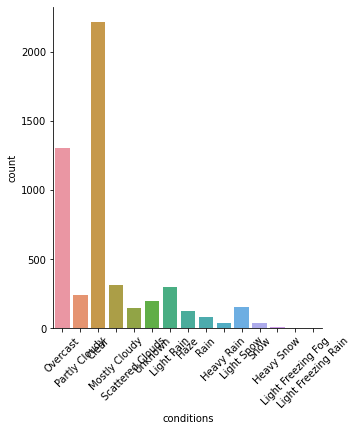

In [8]:
g=sns.catplot(x="conditions", kind='count', data=df_weather)
g.set_xticklabels(rotation=45)

In [9]:
df_weather['dailysnow'].value_counts()

0.00     4491
T         347
0.40       90
1.40       46
26.60      45
2.50       44
0.10       44
0.50       41
0.20       27
Name: dailysnow, dtype: int64

In [10]:
df_weather['dailyprecip'].value_counts()

0.00    2577
T        511
0.01     235
0.04     134
0.05     126
0.16     105
0.09      99
0.02      87
0.24      75
1.22      71
0.06      70
1.01      60
1.65      56
0.11      56
0.45      55
0.61      55
0.12      53
0.54      49
0.91      47
0.44      46
0.38      46
1.80      46
2.31      45
0.53      44
0.73      41
0.83      38
0.30      38
0.07      37
0.29      34
0.40      33
0.22      31
0.15      29
0.14      27
0.18      25
0.20      24
0.03      24
0.47      23
0.25      23
Name: dailyprecip, dtype: int64

In [11]:
df_weather['dailysnow'] = df_weather['dailysnow'].apply(lambda x: 0. if x=='T' else x)
df_weather['dailyprecip'] = df_weather['dailyprecip'].apply(lambda x: 0. if x=='T' else x)

In [12]:
df_weather['dailyprecip'] = df_weather['dailyprecip'].astype(float) 
df_weather['dailysnow'] = df_weather['dailysnow'].astype(float) 

df_weather.corr()

,temp,windspeed,humidity,precip,pressure,dailyprecip,dailysnow,fog,rain,snow
temp,1.000000,-0.284758,-0.010250,0.017233,-0.189795,-0.013406,-0.168303,-0.106217,0.036306,-0.260578
windspeed,-0.284758,1.000000,0.034048,0.093362,-0.112814,0.222404,0.232128,0.178752,0.067027,0.141489
humidity,-0.010250,0.034048,1.000000,0.315985,-0.354540,0.468672,0.118701,0.135414,0.411883,0.217256
precip,0.017233,0.093362,0.315985,1.000000,-0.132731,0.448830,0.178600,0.294496,0.478050,0.101971
pressure,-0.189795,-0.112814,-0.354540,-0.132731,1.000000,-0.228089,-0.070534,-0.070778,-0.188001,-0.023960
dailyprecip,-0.013406,0.222404,0.468672,0.448830,-0.228089,1.000000,0.530793,0.373421,0.365587,0.250516
dailysnow,-0.168303,0.232128,0.118701,0.178600,-0.070534,0.530793,1.000000,0.635886,-0.028523,0.496335
fog,-0.106217,0.178752,0.135414,0.294496,-0.070778,0.373421,0.635886,1.000000,0.029594,0.390533
rain,0.036306,0.067027,0.411883,0.478050,-0.188001,0.365587,-0.028523,0.029594,1.000000,-0.059815
snow,-0.260578,0.141489,0.217256,0.101971,-0.023960,0.250516,0.496335,0.390533,-0.059815,1.000000


### Заполняем None

#### windspeed

In [13]:
# заполняем последним встретившимся не пустым значением
df_weather['windspeed'] = df_weather['windspeed'].fillna(method='backfill')
df_weather['windspeed'] = df_weather['windspeed'].fillna(method='ffill')
df_weather['windspeed'] = df_weather['windspeed'].fillna(0.)

#### pressure

In [14]:
# заполняем последним встретившимся не пустым значением
df_weather['pressure'] = df_weather['pressure'].fillna(method='backfill')
df_weather['pressure'] = df_weather['pressure'].fillna(method='ffill')

### Категориальныая фича

In [15]:
categorical_features = ['conditions']
print(df_weather.shape)
df_weather = pd.get_dummies(df_weather, columns=categorical_features)
print(df_weather.shape)
df_weather.head()

(5175, 12)
(5175, 26)


,timestamp,temp,windspeed,humidity,precip,pressure,dailyprecip,dailysnow,fog,rain,...,conditions_Light Freezing Rain,conditions_Light Rain,conditions_Light Snow,conditions_Mostly Cloudy,conditions_Overcast,conditions_Partly Cloudy,conditions_Rain,conditions_Scattered Clouds,conditions_Snow,conditions_Unknown
0,2016-01-01 00:51:00,42.1,4.6,51.0,0.0,30.06,0.0,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2016-01-01 01:51:00,41.0,3.5,53.0,0.0,30.06,0.0,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2016-01-01 02:51:00,41.0,4.6,55.0,0.0,30.06,0.0,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,2016-01-01 03:51:00,41.0,9.2,55.0,0.0,30.06,0.0,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,2016-01-01 04:51:00,39.9,10.4,58.0,0.0,30.04,0.0,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [16]:
df_weather.iloc[:,11:]

,conditions_Clear,conditions_Haze,conditions_Heavy Rain,conditions_Heavy Snow,conditions_Light Freezing Fog,conditions_Light Freezing Rain,conditions_Light Rain,conditions_Light Snow,conditions_Mostly Cloudy,conditions_Overcast,conditions_Partly Cloudy,conditions_Rain,conditions_Scattered Clouds,conditions_Snow,conditions_Unknown
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5170,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5171,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5172,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5173,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [17]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5175 entries, 0 to 5174
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   timestamp                       5175 non-null   object 
 1   temp                            5175 non-null   float64
 2   windspeed                       5175 non-null   float64
 3   humidity                        5175 non-null   float64
 4   precip                          5175 non-null   float64
 5   pressure                        5175 non-null   float64
 6   dailyprecip                     5175 non-null   float64
 7   dailysnow                       5175 non-null   float64
 8   fog                             5175 non-null   int64  
 9   rain                            5175 non-null   int64  
 10  snow                            5175 non-null   int64  
 11  conditions_Clear                5175 non-null   uint8  
 12  conditions_Haze                 51

###  Формируем таргет и множества для обучения и тестирования

Будем предсказывать скорость ветра с горизонтом прогнозирования +2 часа вперед

In [18]:
#  Сдвигаем столбец windspeed на 2 часа назад
df_weather['windspeed_target'] = df_weather['windspeed'].shift(-2)

In [19]:
df_weather.tail()

,timestamp,temp,windspeed,humidity,precip,pressure,dailyprecip,dailysnow,fog,rain,...,conditions_Light Rain,conditions_Light Snow,conditions_Mostly Cloudy,conditions_Overcast,conditions_Partly Cloudy,conditions_Rain,conditions_Scattered Clouds,conditions_Snow,conditions_Unknown,windspeed_target
5170,2016-07-01 22:25:00,66.9,3.5,93.0,0.44,29.90,0.83,0.0,0,1,...,1,0,0,0,0,0,0,0,0,3.5
5171,2016-07-01 22:29:00,66.9,3.5,93.0,0.44,29.90,0.83,0.0,0,1,...,1,0,0,0,0,0,0,0,0,3.5
5172,2016-07-01 22:38:00,66.0,3.5,93.0,0.44,29.90,0.83,0.0,0,0,...,0,0,1,0,0,0,0,0,0,3.5
5173,2016-07-01 22:51:00,66.9,3.5,93.0,0.44,29.88,0.83,0.0,0,0,...,0,0,0,0,0,0,1,0,0,NaN
5174,2016-07-01 23:51:00,66.9,3.5,93.0,0.00,29.86,0.83,0.0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [20]:
# Удаляем последние 2 строки
df_weather = df_weather.dropna()

In [21]:
df_weather['timestamp'] = df_weather['timestamp'].map(lambda s: datetime.fromisoformat(s))
df_weather.index = df_weather['timestamp']
df_weather.index.name = 'index'
df_weather.drop(['timestamp'], axis=1, inplace=True)

#### Датасет для обучения

In [22]:
X_train = df_weather[:4000]
X_train.head()

,temp,windspeed,humidity,precip,pressure,dailyprecip,dailysnow,fog,rain,snow,...,conditions_Light Rain,conditions_Light Snow,conditions_Mostly Cloudy,conditions_Overcast,conditions_Partly Cloudy,conditions_Rain,conditions_Scattered Clouds,conditions_Snow,conditions_Unknown,windspeed_target
index,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:51:00,42.1,4.6,51.0,0.0,30.06,0.0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,4.6
2016-01-01 01:51:00,41.0,3.5,53.0,0.0,30.06,0.0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,9.2
2016-01-01 02:51:00,41.0,4.6,55.0,0.0,30.06,0.0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,10.4
2016-01-01 03:51:00,41.0,9.2,55.0,0.0,30.06,0.0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,6.9
2016-01-01 04:51:00,39.9,10.4,58.0,0.0,30.04,0.0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,6.9


In [45]:
y_train = X_train['windspeed_target']
X_train.drop(['windspeed_target'], axis=1, inplace=True)

In [46]:
print(f'X_train.shape={X_train.shape}')
print(f'y_train.shape={y_train.shape}')

X_train.shape=(4000, 25)
y_train.shape=(4000,)


####  Датасет для тестирования

In [47]:
X_test = df_weather[4000:]
y_test = X_test['windspeed_target']
X_test.drop(['windspeed_target'], axis=1, inplace=True)

In [48]:
print(f'X_test.shape={X_test.shape}')
print(f'y_test.shape={y_test.shape}')

X_test.shape=(1173, 25)
y_test.shape=(1173,)


### Строим модельку

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import numpy as np

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [50]:
y_predict = reg.predict(X_test)

In [51]:
mean_absolute_error(y_test, y_predict)

1.4968302530303663

#### Сравнимся с предиктом со средним

In [52]:
y_test_mean =  [np.array(y_test).mean()]*len(X_test)

In [53]:
mean_absolute_error(y_test, y_test_mean)

1.5912408271066312

## Задание
1) Добавить фичей, улучшить качество
2) Подумать как проще и точнее получить прогноз 